In [2]:
import numpy as np
import pandas as pd

from sklearn import metrics

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, Dense
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


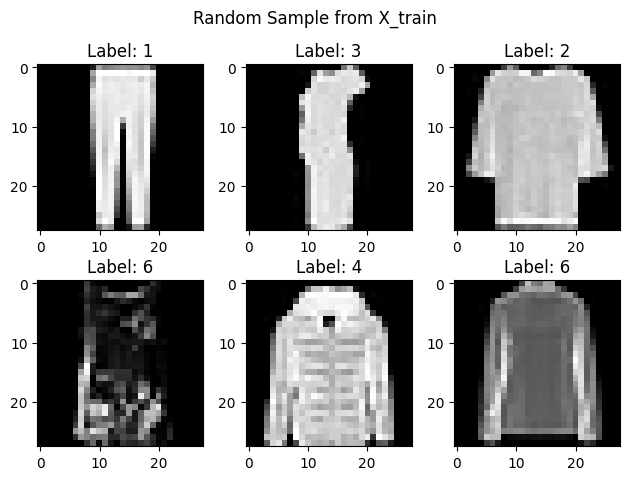

In [4]:
random_index = np.random.randint(1, x_train.shape[0], 6)

for idx, index in enumerate(random_index, start=1):
  plt.subplot(2, 3, idx)
  plt.imshow(x_train[index], cmap="gray")
  plt.title(f"Label: {y_train[index]}")

plt.suptitle("Random Sample from X_train")
plt.tight_layout()
plt.show()

In [5]:
X_train = x_train.reshape(-1, 28, 28, 1).astype("float32")
X_test = x_test.reshape(-1, 28, 28, 1).astype("float32")

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [6]:
X_train /= 255
X_test /= 255

In [15]:
model_input = Input(shape=X_train.shape[1:])
x = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu")(model_input)
x = AveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu")(x)
x = AveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation="relu", padding="valid")(x)
x = AveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(units=64, activation="relu", kernel_regularizer=L1L2())(x)
x = Dense(units=32, activation="relu", kernel_regularizer=L1L2())(x)
output = Dense(units=len(set(y_train)), activation="softmax")(x)

f_c_model = Model(inputs=model_input, outputs=output)

f_c_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 average_pooling2d (Average  (None, 13, 13, 128)       0         
 Pooling2D)                                                      
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 batch_normalization_6 (Bat  (None, 13, 13, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        7379

In [16]:
f_c_model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
history_1 = f_c_model.fit(x=X_train, y=Y_train,
                          validation_data=(X_test, Y_test),
                          epochs=10,
                          batch_size=32,
                          callbacks=[EarlyStopping(patience=2)])

Epoch 1/10
1875/1875 [==============================] - 146s 77ms/step - loss: 1.1775 - accuracy: 0.5564 - val_loss: 0.7126 - val_accuracy: 0.7213
Epoch 2/10
1875/1875 [==============================] - 145s 78ms/step - loss: 0.8076 - accuracy: 0.6912 - val_loss: 0.6413 - val_accuracy: 0.7422
Epoch 3/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.7337 - accuracy: 0.7208 - val_loss: 0.6092 - val_accuracy: 0.7523
Epoch 4/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.6885 - accuracy: 0.7373 - val_loss: 0.5754 - val_accuracy: 0.7723
Epoch 5/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.6570 - accuracy: 0.7511 - val_loss: 0.5357 - val_accuracy: 0.7938
Epoch 6/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.6220 - accuracy: 0.7632 - val_loss: 0.5267 - val_accuracy: 0.7992
Epoch 7/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.6020 - accuracy: 0.7711 - val_loss: 0

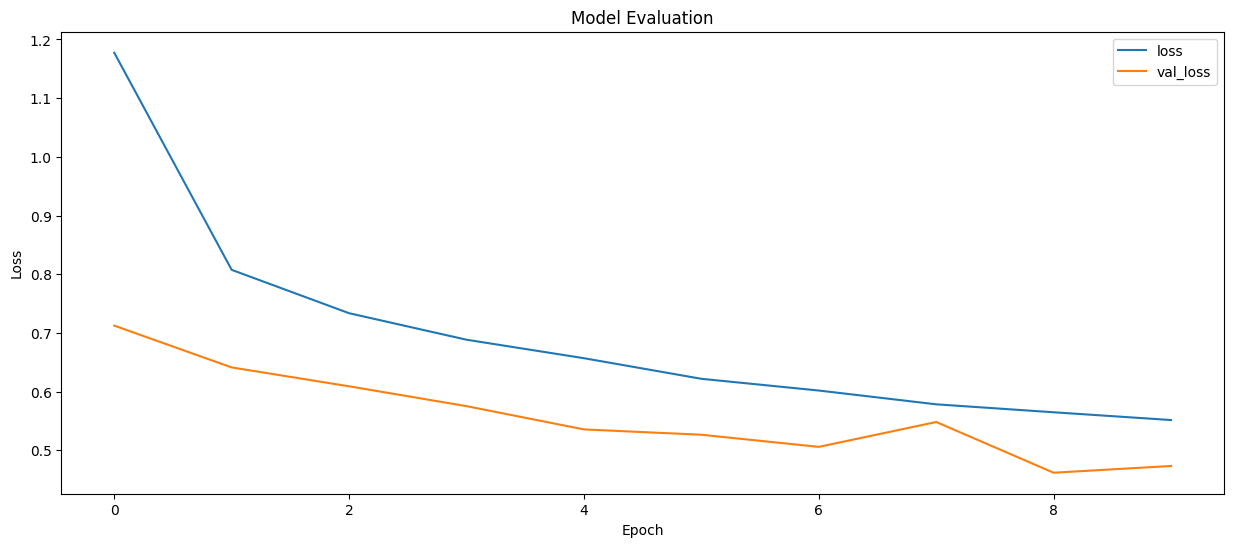

In [18]:
pd.DataFrame(history_1.history)[["loss", "val_loss"]].plot(figsize=(15, 6), xlabel="Epoch", ylabel="Loss", title="Model Evaluation")
plt.show()

In [19]:
prediction = np.argmax(f_c_model.predict(X_test), axis=1)

313/313 [==============================] - 6s 18ms/step


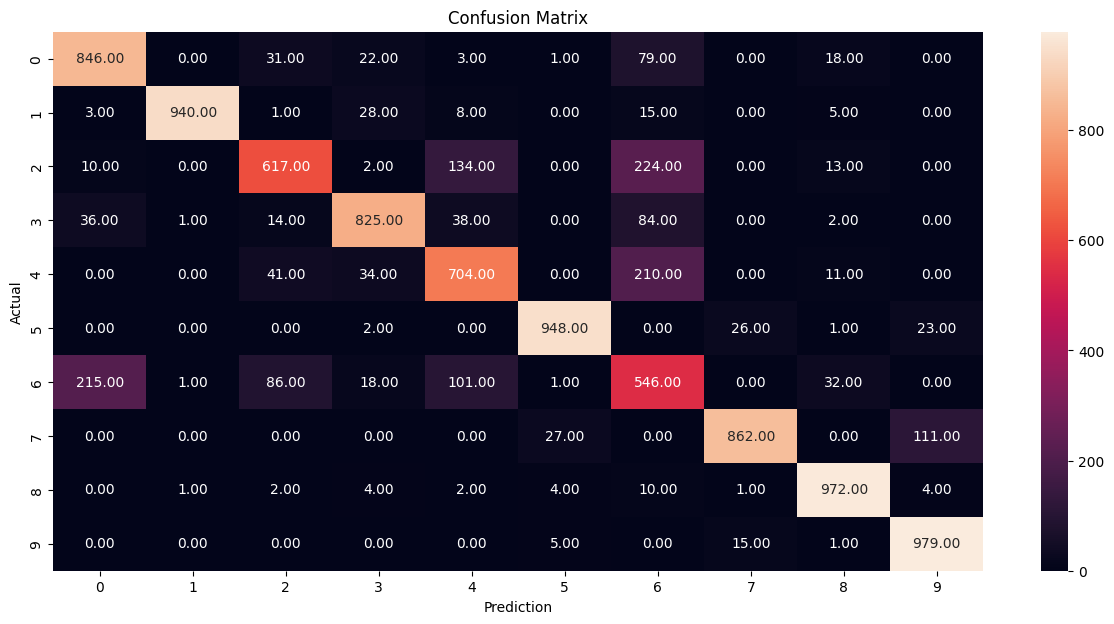

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, fmt=".2f")
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [21]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       1.00      0.94      0.97      1000
           2       0.78      0.62      0.69      1000
           3       0.88      0.82      0.85      1000
           4       0.71      0.70      0.71      1000
           5       0.96      0.95      0.95      1000
           6       0.47      0.55      0.50      1000
           7       0.95      0.86      0.91      1000
           8       0.92      0.97      0.95      1000
           9       0.88      0.98      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.83     10000
weighted avg       0.83      0.82      0.83     10000



In [22]:
f_c_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
history_2 = f_c_model.fit(x=X_train, y=y_train,
                          validation_data=(X_test, y_test),
                          epochs=10,
                          batch_size=32,
                          callbacks=[EarlyStopping(patience=2)])

Epoch 1/10
1875/1875 [==============================] - 157s 83ms/step - loss: 0.5516 - accuracy: 0.7950 - val_loss: 0.4718 - val_accuracy: 0.8219
Epoch 2/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.5031 - accuracy: 0.8140 - val_loss: 0.4118 - val_accuracy: 0.8436
Epoch 3/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.4764 - accuracy: 0.8242 - val_loss: 0.3885 - val_accuracy: 0.8567
Epoch 4/10
1875/1875 [==============================] - 149s 80ms/step - loss: 0.4622 - accuracy: 0.8313 - val_loss: 0.3675 - val_accuracy: 0.8645
Epoch 5/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.4566 - accuracy: 0.8355 - val_loss: 0.3478 - val_accuracy: 0.8760
Epoch 6/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.4445 - accuracy: 0.8385 - val_loss: 0.3570 - val_accuracy: 0.8671
Epoch 7/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.4376 - accuracy: 0.8410 - val_loss: 0

<Axes: title={'center': 'Model Evaluation'}, xlabel='Epochs', ylabel='Loss'>

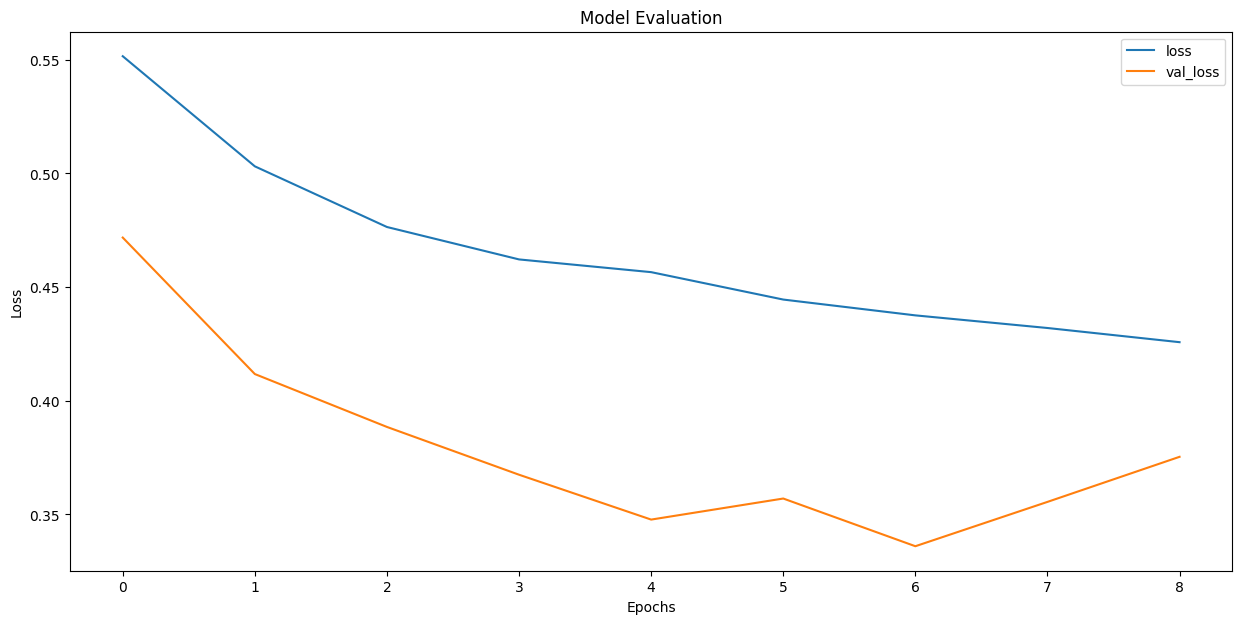

In [24]:
pd.DataFrame(history_2.history)[["loss", "val_loss"]].plot(figsize=(15,7),
                                                           xlabel="Epochs",
                                                           ylabel="Loss",
                                                           title="Model Evaluation")

In [28]:
prediction_2 = np.argmax(f_c_model.predict(X_test), axis=1)

313/313 [==============================] - 7s 23ms/step


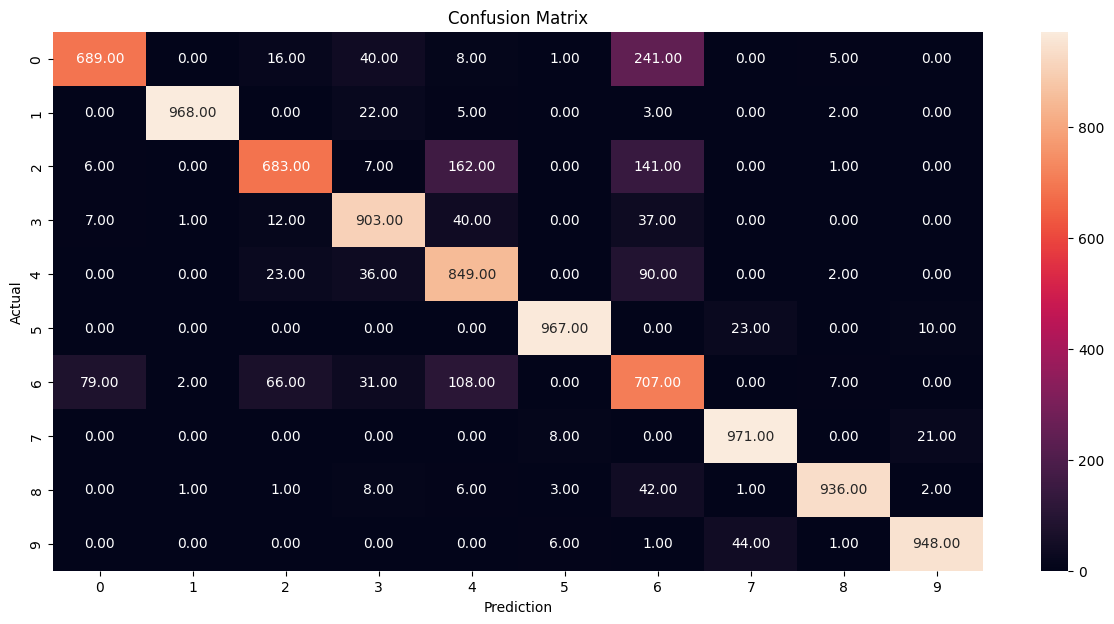

In [29]:
plt.figure(figsize=(15, 7))
sns.heatmap(metrics.confusion_matrix(y_test, prediction_2), annot=True, fmt=".2f")
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [31]:
print(metrics.classification_report(y_test, prediction_2))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1000
           1       1.00      0.97      0.98      1000
           2       0.85      0.68      0.76      1000
           3       0.86      0.90      0.88      1000
           4       0.72      0.85      0.78      1000
           5       0.98      0.97      0.97      1000
           6       0.56      0.71      0.63      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.94      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



# Eddy